Original shape: (2250, 4000)
Weight shape after reshaping: (9000000,)
Effective number of parameters (neff): 5753578
Number of top indices selected: 5753578


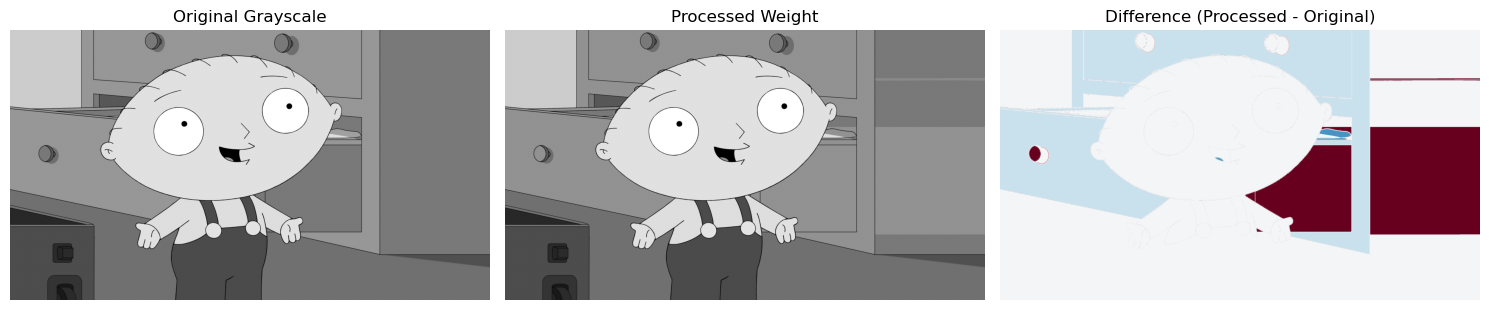


Statistics:
Original mean: 145.99
Processed mean: 148.41
Number of non-zero pixels in processed image: 5753578
Percentage of pixels retained: 63.93%


In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from math import floor

# Load and convert image to grayscale
image = Image.open('stewie.jpg')  # Replace with your image path
gray_image = image.convert('L')
gray_array = np.array(gray_image, dtype=float)

# Store original shape for later reshaping
original_shape = gray_array.shape
print(f"Original shape: {original_shape}")

# Step 1: Calculate mean and subtract from all pixels
mean = np.mean(gray_array)
pixel_minus_mean = gray_array - mean

# Step 2: Reshape to 1D with name weight
weight = pixel_minus_mean.reshape(-1)
print(f"Weight shape after reshaping: {weight.shape}")

# Step 3: w = np.abs(weight)
w = np.abs(weight) / np.sum(np.abs(weight))

neff = floor(1 / np.sum(w ** 2))
print(f"Effective number of parameters (neff): {neff}")

# Step 5: Sort w in descending order and find index of top neff values
sorted_indices = np.argsort(w)[::-1]  # Descending order
top_neff_indices = sorted_indices[:neff] if neff > 0 else []
print(f"Number of top indices selected: {len(top_neff_indices)}")

# Step 6: Turn weight to 0 if not in top neff indices
weight_filtered = np.zeros_like(weight)
if len(top_neff_indices) > 0:
    weight_filtered[top_neff_indices] = weight[top_neff_indices]

# Step 7: Add mean back
weight_final = weight_filtered + mean

# Step 8: Reshape back to original shape and plot
weight_reshaped = weight_final.reshape(original_shape)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original grayscale image
axes[0].imshow(gray_array, cmap='gray')
axes[0].set_title('Original Grayscale')
axes[0].axis('off')

# Processed weight image
axes[1].imshow(weight_reshaped, cmap='gray')
axes[1].set_title('Processed Weight')
axes[1].axis('off')

# Difference visualization
diff = weight_reshaped - gray_array
axes[2].imshow(diff, cmap='RdBu_r')
axes[2].set_title('Difference (Processed - Original)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Print some statistics
print(f"\nStatistics:")
print(f"Original mean: {np.mean(gray_array):.2f}")
print(f"Processed mean: {np.mean(weight_reshaped):.2f}")
print(f"Number of non-zero pixels in processed image: {np.count_nonzero(weight_filtered)}")
print(f"Percentage of pixels retained: {(np.count_nonzero(weight_filtered) / len(weight)) * 100:.2f}%")

Original RGB shape: (2250, 4000, 3)
Total pixels per channel: 9000000

Original channel means:
R: 182.09, G: 137.03, B: 96.63

Processing R channel...
Channel mean: 182.09
neff: 5251068

Processing G channel...
Channel mean: 137.03
neff: 5642538

Processing B channel...
Channel mean: 96.63
neff: 5977492


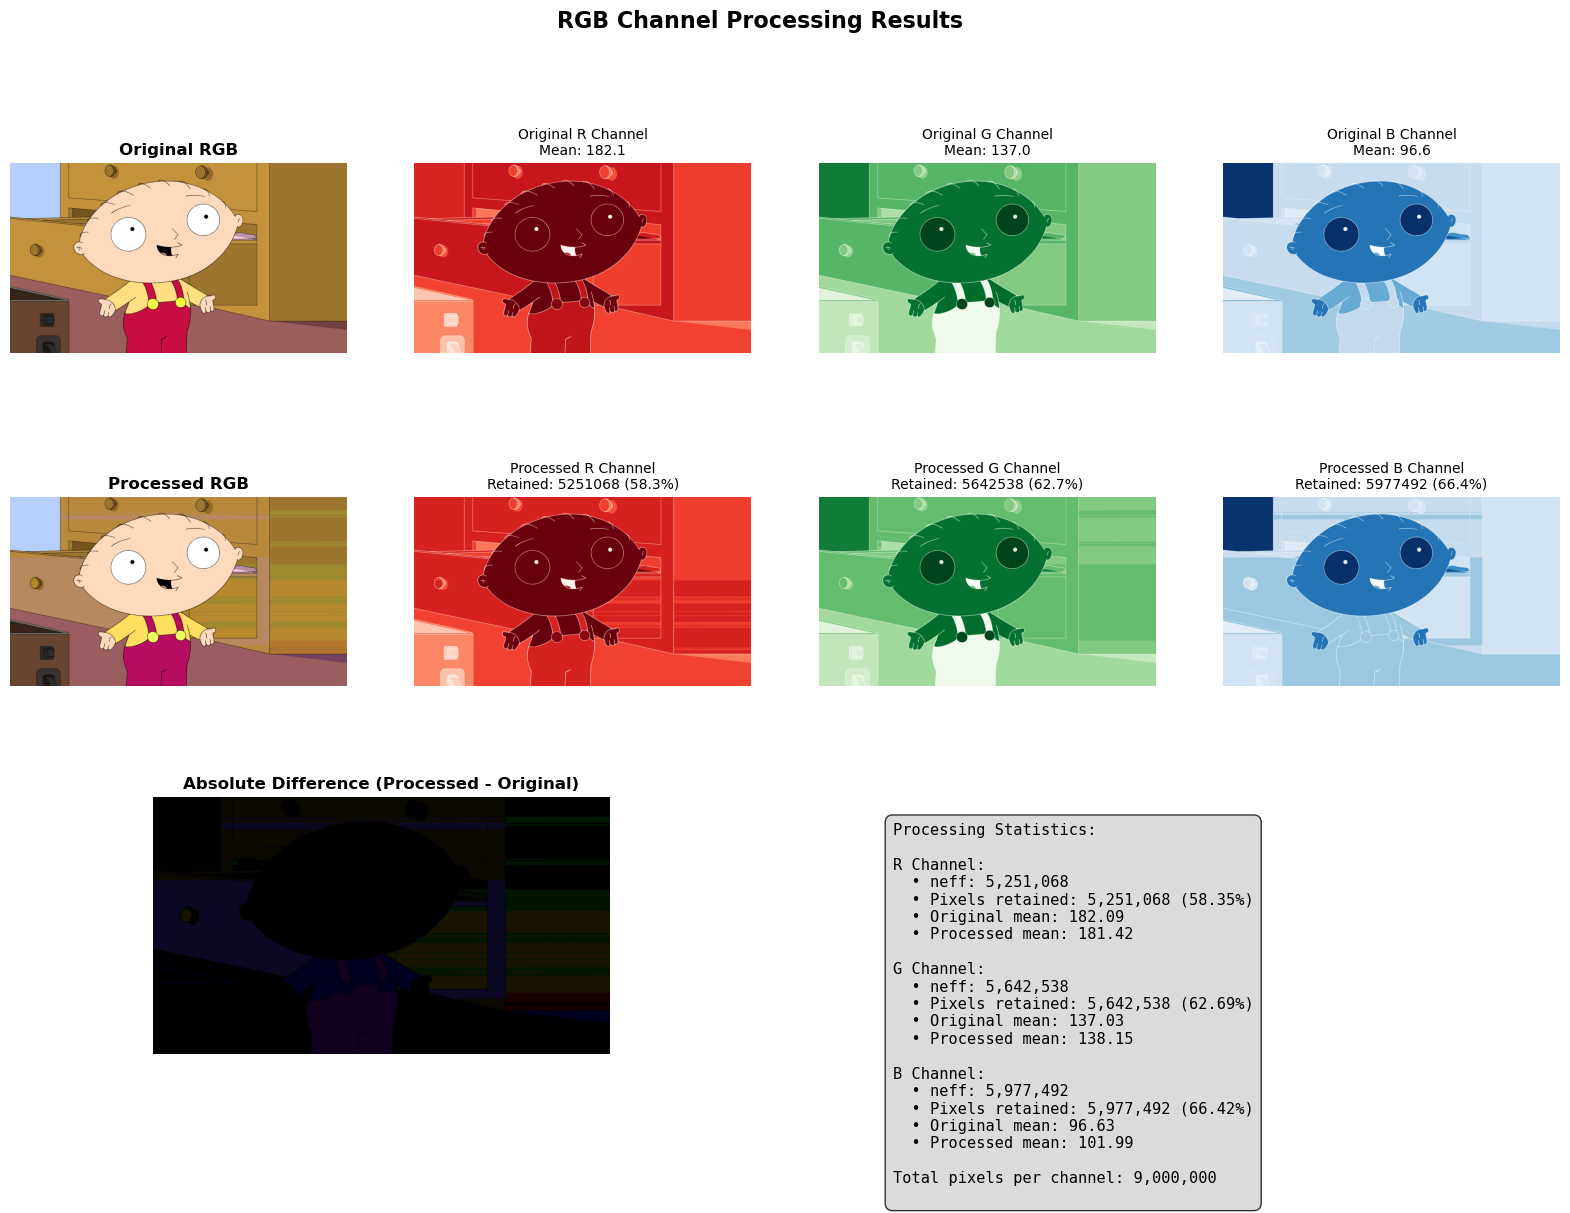


FINAL PROCESSING STATISTICS
R Channel - neff: 5,251,068, pixels retained: 5,251,068 (58.35%)
G Channel - neff: 5,642,538, pixels retained: 5,642,538 (62.69%)
B Channel - neff: 5,977,492, pixels retained: 5,977,492 (66.42%)

Mean Preservation Check:
Original means - R: 182.09, G: 137.03, B: 96.63
Processed means - R: 181.42, G: 138.15, B: 101.99

Total pixels per channel: 9,000,000
Image dimensions: 2250 x 4000 pixels

Processed image saved as 'processed_rgb_image.jpg'


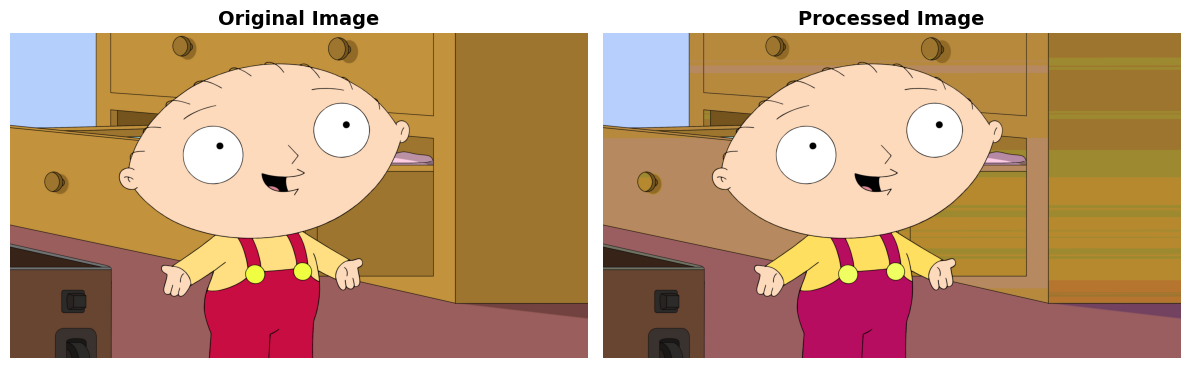

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from math import floor

def process_channel(channel_array):
    """Process a single channel according to the specified steps"""
    # Store original shape
    original_shape = channel_array.shape
    
    # Step 1: Calculate mean and subtract from all pixels
    channel_mean = np.mean(channel_array)
    pixel_minus_mean = channel_array - channel_mean
    print(f"Channel mean: {channel_mean:.2f}")
    
    # Step 2: Reshape to 1D with name weight
    weight = pixel_minus_mean.reshape(-1)
    
    # Step 3: w = np.abs(weight) normalized by sum
    w = np.abs(weight) / np.sum(np.abs(weight))
    
    # Step 4: Calculate neff = floor(1 / sum(w^2))
    neff = floor(1 / np.sum(w ** 2))
    print(f"neff: {neff}")
    
    # Step 5: Sort w in descending order and find index of top neff values
    sorted_indices = np.argsort(w)[::-1]
    top_neff_indices = sorted_indices[:neff] if neff > 0 else []
    
    # Step 6: Turn weight to 0 if not in top neff indices
    weight_filtered = np.zeros_like(weight)
    if len(top_neff_indices) > 0:
        weight_filtered[top_neff_indices] = weight[top_neff_indices]
    
    # Step 7: Add mean back to filtered weights
    weight_final = weight_filtered + channel_mean
    
    # Step 8: Reshape back to original shape
    weight_reshaped = weight_final.reshape(original_shape)
    
    return weight_reshaped, neff, len(top_neff_indices), channel_mean

# Load the RGB image
image_path = 'stewie.jpg'  # Replace with your image path
image = Image.open(image_path)
rgb_array = np.array(image, dtype=float)

print(f"Original RGB shape: {rgb_array.shape}")
print(f"Total pixels per channel: {rgb_array.shape[0] * rgb_array.shape[1]}")

# Separate RGB channels
r_channel = rgb_array[:, :, 0]
g_channel = rgb_array[:, :, 1] 
b_channel = rgb_array[:, :, 2]

# Calculate overall means for reference
r_mean_original = np.mean(r_channel)
g_mean_original = np.mean(g_channel)
b_mean_original = np.mean(b_channel)

print(f"\nOriginal channel means:")
print(f"R: {r_mean_original:.2f}, G: {g_mean_original:.2f}, B: {b_mean_original:.2f}")

# Process each channel
print("\n" + "="*50)
print("Processing R channel...")
r_processed, r_neff, r_pixels, r_mean = process_channel(r_channel)

print("\n" + "="*50)
print("Processing G channel...")
g_processed, g_neff, g_pixels, g_mean = process_channel(g_channel)

print("\n" + "="*50)
print("Processing B channel...")
b_processed, b_neff, b_pixels, b_mean = process_channel(b_channel)

# Combine processed channels back to RGB
processed_rgb = np.stack([r_processed, g_processed, b_processed], axis=2)

# Ensure values are in valid range [0, 255] for display
processed_rgb_clipped = np.clip(processed_rgb, 0, 255)

# Convert to uint8 for proper display
original_rgb_uint8 = rgb_array.astype(np.uint8)
processed_rgb_uint8 = processed_rgb_clipped.astype(np.uint8)

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 12))

# Create a 3x4 grid
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.2)

# Row 1: Original images
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(original_rgb_uint8)
ax1.set_title('Original RGB', fontsize=12, fontweight='bold')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(r_channel, cmap='Reds', vmin=0, vmax=255)
ax2.set_title(f'Original R Channel\nMean: {r_mean:.1f}', fontsize=10)
ax2.axis('off')

ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(g_channel, cmap='Greens', vmin=0, vmax=255)
ax3.set_title(f'Original G Channel\nMean: {g_mean:.1f}', fontsize=10)
ax3.axis('off')

ax4 = fig.add_subplot(gs[0, 3])
ax4.imshow(b_channel, cmap='Blues', vmin=0, vmax=255)
ax4.set_title(f'Original B Channel\nMean: {b_mean:.1f}', fontsize=10)
ax4.axis('off')

# Row 2: Processed images
ax5 = fig.add_subplot(gs[1, 0])
ax5.imshow(processed_rgb_uint8)
ax5.set_title('Processed RGB', fontsize=12, fontweight='bold')
ax5.axis('off')

ax6 = fig.add_subplot(gs[1, 1])
ax6.imshow(r_processed, cmap='Reds', vmin=0, vmax=255)
ax6.set_title(f'Processed R Channel\nRetained: {r_pixels} ({(r_pixels/r_channel.size)*100:.1f}%)', fontsize=10)
ax6.axis('off')

ax7 = fig.add_subplot(gs[1, 2])
ax7.imshow(g_processed, cmap='Greens', vmin=0, vmax=255)
ax7.set_title(f'Processed G Channel\nRetained: {g_pixels} ({(g_pixels/g_channel.size)*100:.1f}%)', fontsize=10)
ax7.axis('off')

ax8 = fig.add_subplot(gs[1, 3])
ax8.imshow(b_processed, cmap='Blues', vmin=0, vmax=255)
ax8.set_title(f'Processed B Channel\nRetained: {b_pixels} ({(b_pixels/b_channel.size)*100:.1f}%)', fontsize=10)
ax8.axis('off')

# Row 3: Comparison and statistics
ax9 = fig.add_subplot(gs[2, :2])
ax9.imshow(np.abs(processed_rgb - rgb_array).astype(np.uint8))
ax9.set_title('Absolute Difference (Processed - Original)', fontsize=12, fontweight='bold')
ax9.axis('off')

# Statistics text
ax10 = fig.add_subplot(gs[2, 2:])
ax10.axis('off')
stats_text = f"""Processing Statistics:

R Channel:
  • neff: {r_neff:,}
  • Pixels retained: {r_pixels:,} ({(r_pixels/r_channel.size)*100:.2f}%)
  • Original mean: {r_mean:.2f}
  • Processed mean: {np.mean(r_processed):.2f}

G Channel:
  • neff: {g_neff:,}
  • Pixels retained: {g_pixels:,} ({(g_pixels/g_channel.size)*100:.2f}%)
  • Original mean: {g_mean:.2f}
  • Processed mean: {np.mean(g_processed):.2f}

B Channel:
  • neff: {b_neff:,}
  • Pixels retained: {b_pixels:,} ({(b_pixels/b_channel.size)*100:.2f}%)
  • Original mean: {b_mean:.2f}
  • Processed mean: {np.mean(b_processed):.2f}

Total pixels per channel: {r_channel.size:,}
"""
ax10.text(0.1, 0.9, stats_text, transform=ax10.transAxes, fontsize=11, 
          verticalalignment='top', fontfamily='monospace',
          bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

plt.suptitle('RGB Channel Processing Results', fontsize=16, fontweight='bold', y=0.98)
plt.show()

# Print detailed statistics
print("\n" + "="*60)
print("FINAL PROCESSING STATISTICS")
print("="*60)
print(f"R Channel - neff: {r_neff:,}, pixels retained: {r_pixels:,} ({(r_pixels/r_channel.size)*100:.2f}%)")
print(f"G Channel - neff: {g_neff:,}, pixels retained: {g_pixels:,} ({(g_pixels/g_channel.size)*100:.2f}%)")
print(f"B Channel - neff: {b_neff:,}, pixels retained: {b_pixels:,} ({(b_pixels/b_channel.size)*100:.2f}%)")

print(f"\nMean Preservation Check:")
print(f"Original means - R: {r_mean:.2f}, G: {g_mean:.2f}, B: {b_mean:.2f}")
print(f"Processed means - R: {np.mean(r_processed):.2f}, G: {np.mean(g_processed):.2f}, B: {np.mean(b_processed):.2f}")

print(f"\nTotal pixels per channel: {r_channel.size:,}")
print(f"Image dimensions: {rgb_array.shape[0]} x {rgb_array.shape[1]} pixels")

# Save the processed image
processed_image = Image.fromarray(processed_rgb_uint8)
processed_image.save('processed_rgb_image.jpg')
print(f"\nProcessed image saved as 'processed_rgb_image.jpg'")

# Create a simple before/after comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(original_rgb_uint8)
ax1.set_title('Original Image', fontsize=14, fontweight='bold')
ax1.axis('off')

ax2.imshow(processed_rgb_uint8)
ax2.set_title('Processed Image', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()

Processing image: (2160, 3840, 3)
Channel mean: 32.97, neff: 3998633
Channel mean: 58.49, neff: 5273633
Channel mean: 86.69, neff: 6122121

IMAGE DIFFERENCE EVALUATION

1. OVERALL IMAGE SIMILARITY METRICS:
--------------------------------------------------
Mean Squared Error (MSE): 119.62
Peak Signal-to-Noise Ratio (PSNR): 27.35 dB
Structural Similarity Index (SSIM): 0.8894 (1.0 = identical)
Mean Absolute Error (MAE): 5.83

2. DISTRIBUTION DIFFERENCE METRICS:
--------------------------------------------------
KL Divergence: 1.2357
Symmetric KL Divergence: 1.1224
Jensen-Shannon Distance: 0.3986 (0 = identical)
Wasserstein Distance: 3.9261

3. PER-CHANNEL DISTRIBUTION ANALYSIS:
--------------------------------------------------

R Channel:
  KL Divergence: 9.3978
  JS Distance: 0.5778
  Wasserstein: 6.4571

G Channel:
  KL Divergence: 6.4291
  JS Distance: 0.4878
  Wasserstein: 5.6215

B Channel:
  KL Divergence: 4.4723
  JS Distance: 0.4154
  Wasserstein: 5.4173

4. PERCEPTUAL METRICS:


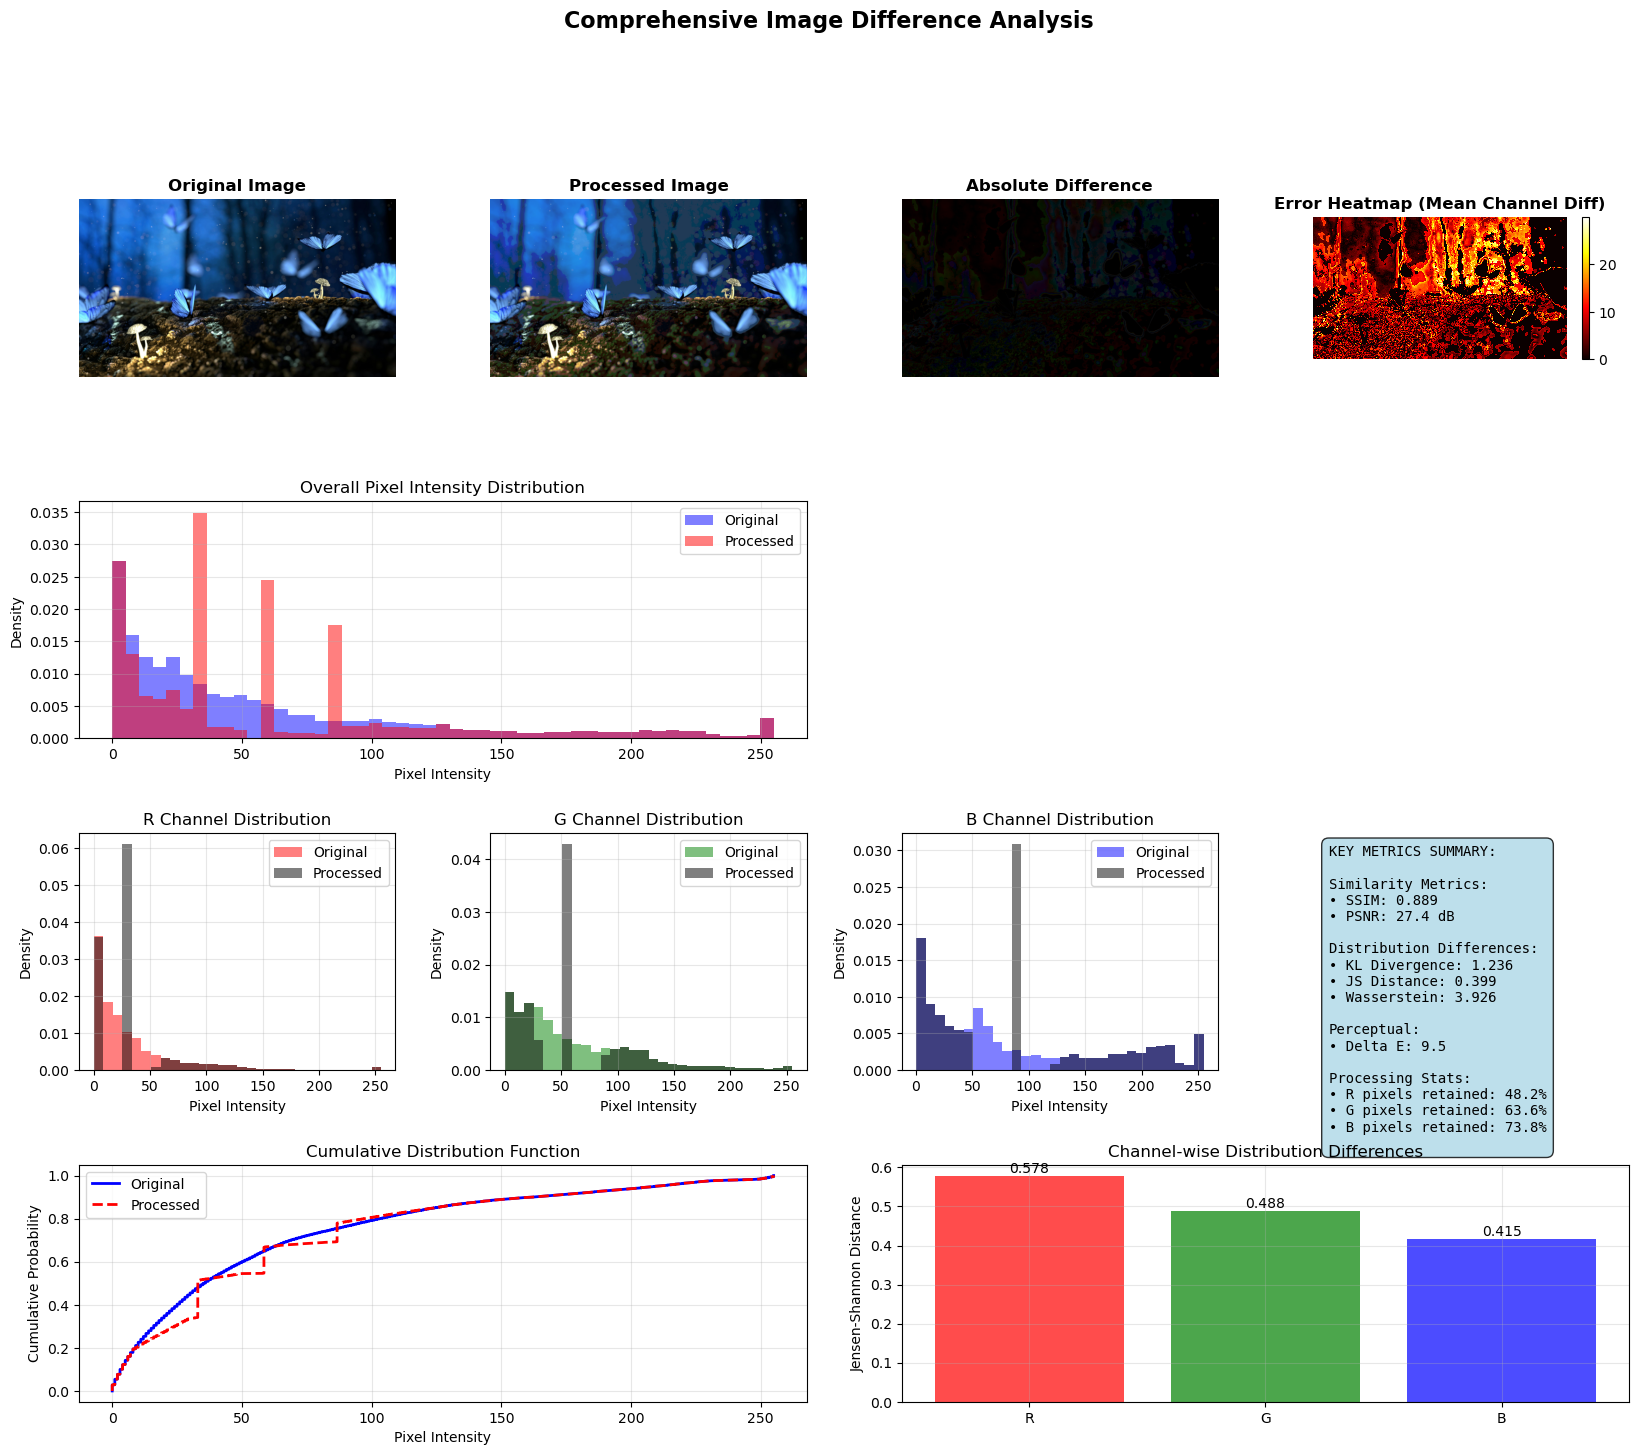

: 

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from math import floor
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import cv2

def process_channel(channel_array):
    """Process a single channel according to the specified steps"""
    original_shape = channel_array.shape
    channel_mean = np.mean(channel_array)
    pixel_minus_mean = channel_array - channel_mean
    weight = pixel_minus_mean.reshape(-1)
    w = np.abs(weight) / np.sum(np.abs(weight))
    neff = floor(1 / np.sum(w ** 2))
    print(f"Channel mean: {channel_mean:.2f}, neff: {neff}")
    sorted_indices = np.argsort(w)[::-1]
    top_neff_indices = sorted_indices[:neff] if neff > 0 else []
    weight_filtered = np.zeros_like(weight)
    if len(top_neff_indices) > 0:
        weight_filtered[top_neff_indices] = weight[top_neff_indices]
    weight_final = weight_filtered + channel_mean
    weight_reshaped = weight_final.reshape(original_shape)
    return weight_reshaped, neff, len(top_neff_indices), channel_mean

def calculate_histogram_metrics(original, processed, bins=256):
    """Calculate histogram-based distribution difference metrics"""
    # Ensure images are in the same range
    original = np.clip(original, 0, 255).astype(np.uint8)
    processed = np.clip(processed, 0, 255).astype(np.uint8)
    
    # Calculate histograms
    hist_orig = np.histogram(original.flatten(), bins=bins, range=(0, 255), density=True)[0]
    hist_proc = np.histogram(processed.flatten(), bins=bins, range=(0, 255), density=True)[0]
    
    # Add small epsilon to avoid log(0) issues
    epsilon = 1e-10
    hist_orig = hist_orig + epsilon
    hist_proc = hist_proc + epsilon
    
    # Normalize to create probability distributions
    hist_orig = hist_orig / np.sum(hist_orig)
    hist_proc = hist_proc / np.sum(hist_proc)
    
    # KL Divergence (original || processed)
    kl_div = entropy(hist_orig, hist_proc)
    
    # Symmetric KL Divergence
    kl_sym = 0.5 * (entropy(hist_orig, hist_proc) + entropy(hist_proc, hist_orig))
    
    # Jensen-Shannon Distance (square root of JS divergence)
    js_distance = jensenshannon(hist_orig, hist_proc)
    
    # Wasserstein Distance (Earth Mover's Distance)
    cumsum_orig = np.cumsum(hist_orig)
    cumsum_proc = np.cumsum(hist_proc)
    wasserstein = np.sum(np.abs(cumsum_orig - cumsum_proc))
    
    return {
        'kl_divergence': kl_div,
        'symmetric_kl': kl_sym,
        'js_distance': js_distance,
        'wasserstein': wasserstein,
        'hist_original': hist_orig,
        'hist_processed': hist_proc
    }

def calculate_image_metrics(original, processed):
    """Calculate traditional image similarity metrics"""
    # Ensure images are in the same range and type
    original = np.clip(original, 0, 255).astype(np.uint8)
    processed = np.clip(processed, 0, 255).astype(np.uint8)
    
    # Mean Squared Error
    mse = np.mean((original.astype(float) - processed.astype(float)) ** 2)
    
    # Peak Signal-to-Noise Ratio
    psnr_value = psnr(original, processed, data_range=255)
    
    # Structural Similarity Index
    if len(original.shape) == 3:  # RGB image
        ssim_value = ssim(original, processed, multichannel=True, channel_axis=2, data_range=255)
    else:  # Grayscale
        ssim_value = ssim(original, processed, data_range=255)
    
    # Mean Absolute Error
    mae = np.mean(np.abs(original.astype(float) - processed.astype(float)))
    
    return {
        'mse': mse,
        'psnr': psnr_value,
        'ssim': ssim_value,
        'mae': mae
    }

def calculate_perceptual_metrics(original, processed):
    """Calculate perceptual difference metrics"""
    # Convert to LAB color space for perceptual comparison
    original_lab = cv2.cvtColor(original.astype(np.uint8), cv2.COLOR_RGB2LAB)
    processed_lab = cv2.cvtColor(processed.astype(np.uint8), cv2.COLOR_RGB2LAB)
    
    # Delta E (perceptual color difference)
    delta_e = np.mean(np.sqrt(np.sum((original_lab.astype(float) - processed_lab.astype(float)) ** 2, axis=2)))
    
    return {'delta_e': delta_e}

# Load and process the image
image_path = 'test1.jpg'  # Replace with your image path
image = Image.open(image_path)
rgb_array = np.array(image, dtype=float)

print(f"Processing image: {rgb_array.shape}")

# Separate and process RGB channels
r_channel = rgb_array[:, :, 0]
g_channel = rgb_array[:, :, 1] 
b_channel = rgb_array[:, :, 2]

r_processed, r_neff, r_pixels, r_mean = process_channel(r_channel)
g_processed, g_neff, g_pixels, g_mean = process_channel(g_channel)
b_processed, b_neff, b_pixels, b_mean = process_channel(b_channel)

# Combine processed channels
processed_rgb = np.stack([r_processed, g_processed, b_processed], axis=2)
processed_rgb_clipped = np.clip(processed_rgb, 0, 255)

print("\n" + "="*80)
print("IMAGE DIFFERENCE EVALUATION")
print("="*80)

# 1. Overall RGB Image Metrics
print("\n1. OVERALL IMAGE SIMILARITY METRICS:")
print("-" * 50)
image_metrics = calculate_image_metrics(rgb_array, processed_rgb_clipped)
print(f"Mean Squared Error (MSE): {image_metrics['mse']:.2f}")
print(f"Peak Signal-to-Noise Ratio (PSNR): {image_metrics['psnr']:.2f} dB")
print(f"Structural Similarity Index (SSIM): {image_metrics['ssim']:.4f} (1.0 = identical)")
print(f"Mean Absolute Error (MAE): {image_metrics['mae']:.2f}")

# 2. Histogram-based Distribution Metrics
print("\n2. DISTRIBUTION DIFFERENCE METRICS:")
print("-" * 50)
hist_metrics = calculate_histogram_metrics(rgb_array, processed_rgb_clipped)
print(f"KL Divergence: {hist_metrics['kl_divergence']:.4f}")
print(f"Symmetric KL Divergence: {hist_metrics['symmetric_kl']:.4f}")
print(f"Jensen-Shannon Distance: {hist_metrics['js_distance']:.4f} (0 = identical)")
print(f"Wasserstein Distance: {hist_metrics['wasserstein']:.4f}")

# 3. Per-channel Analysis
print("\n3. PER-CHANNEL DISTRIBUTION ANALYSIS:")
print("-" * 50)
channels = [('R', r_channel, r_processed), ('G', g_channel, g_processed), ('B', b_channel, b_processed)]
channel_metrics = {}

for name, orig_ch, proc_ch in channels:
    ch_metrics = calculate_histogram_metrics(orig_ch, proc_ch)
    channel_metrics[name] = ch_metrics
    print(f"\n{name} Channel:")
    print(f"  KL Divergence: {ch_metrics['kl_divergence']:.4f}")
    print(f"  JS Distance: {ch_metrics['js_distance']:.4f}")
    print(f"  Wasserstein: {ch_metrics['wasserstein']:.4f}")

# 4. Perceptual Metrics
print("\n4. PERCEPTUAL METRICS:")
print("-" * 50)
perceptual_metrics = calculate_perceptual_metrics(rgb_array, processed_rgb_clipped)
print(f"Delta E (perceptual color difference): {perceptual_metrics['delta_e']:.2f}")
print("  • Delta E < 1: Imperceptible difference")
print("  • Delta E 1-3: Just noticeable difference")  
print("  • Delta E 3-6: Noticeable difference")
print("  • Delta E > 6: Very noticeable difference")

# 5. Create comprehensive visualization
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 4, hspace=0.4, wspace=0.3)

# Original vs Processed
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(rgb_array.astype(np.uint8))
ax1.set_title('Original Image', fontweight='bold')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(processed_rgb_clipped.astype(np.uint8))
ax2.set_title('Processed Image', fontweight='bold')
ax2.axis('off')

# Difference visualization
ax3 = fig.add_subplot(gs[0, 2])
diff = np.abs(processed_rgb_clipped - rgb_array)
ax3.imshow(diff.astype(np.uint8))
ax3.set_title('Absolute Difference', fontweight='bold')
ax3.axis('off')

# Error heatmap
ax4 = fig.add_subplot(gs[0, 3])
error_map = np.mean(diff, axis=2)
im = ax4.imshow(error_map, cmap='hot', interpolation='nearest')
ax4.set_title('Error Heatmap (Mean Channel Diff)', fontweight='bold')
ax4.axis('off')
plt.colorbar(im, ax=ax4, shrink=0.6)

# Overall histogram comparison
ax5 = fig.add_subplot(gs[1, :2])
bins = np.linspace(0, 255, 50)
ax5.hist(rgb_array.flatten(), bins=bins, alpha=0.5, label='Original', density=True, color='blue')
ax5.hist(processed_rgb_clipped.flatten(), bins=bins, alpha=0.5, label='Processed', density=True, color='red')
ax5.set_xlabel('Pixel Intensity')
ax5.set_ylabel('Density')
ax5.set_title('Overall Pixel Intensity Distribution')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Channel-wise histogram comparison
colors = ['red', 'green', 'blue']
channel_names = ['R', 'G', 'B']
for i, (name, orig_ch, proc_ch) in enumerate(channels):
    ax = fig.add_subplot(gs[2, i])
    ax.hist(orig_ch.flatten(), bins=30, alpha=0.5, label='Original', density=True, color=colors[i])
    ax.hist(proc_ch.flatten(), bins=30, alpha=0.5, label='Processed', density=True, color='black')
    ax.set_title(f'{name} Channel Distribution')
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Metrics summary
ax_metrics = fig.add_subplot(gs[2, 3])
ax_metrics.axis('off')
metrics_text = f"""KEY METRICS SUMMARY:

Similarity Metrics:
• SSIM: {image_metrics['ssim']:.3f}
• PSNR: {image_metrics['psnr']:.1f} dB

Distribution Differences:
• KL Divergence: {hist_metrics['kl_divergence']:.3f}
• JS Distance: {hist_metrics['js_distance']:.3f}
• Wasserstein: {hist_metrics['wasserstein']:.3f}

Perceptual:
• Delta E: {perceptual_metrics['delta_e']:.1f}

Processing Stats:
• R pixels retained: {(r_pixels/r_channel.size)*100:.1f}%
• G pixels retained: {(g_pixels/g_channel.size)*100:.1f}%
• B pixels retained: {(b_pixels/b_channel.size)*100:.1f}%
"""
ax_metrics.text(0.05, 0.95, metrics_text, transform=ax_metrics.transAxes, 
                fontsize=10, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

# Cumulative distribution comparison
ax6 = fig.add_subplot(gs[3, :2])
orig_sorted = np.sort(rgb_array.flatten())
proc_sorted = np.sort(processed_rgb_clipped.flatten())
n_pixels = len(orig_sorted)
cumulative = np.arange(1, n_pixels + 1) / n_pixels

ax6.plot(orig_sorted[::n_pixels//1000], cumulative[::n_pixels//1000], 'b-', label='Original', linewidth=2)
ax6.plot(proc_sorted[::n_pixels//1000], cumulative[::n_pixels//1000], 'r--', label='Processed', linewidth=2)
ax6.set_xlabel('Pixel Intensity')
ax6.set_ylabel('Cumulative Probability')
ax6.set_title('Cumulative Distribution Function')
ax6.legend()
ax6.grid(True, alpha=0.3)

# Channel-wise JS Distance comparison
ax7 = fig.add_subplot(gs[3, 2:])
js_distances = [channel_metrics['R']['js_distance'], 
                channel_metrics['G']['js_distance'], 
                channel_metrics['B']['js_distance']]
bars = ax7.bar(['R', 'G', 'B'], js_distances, color=['red', 'green', 'blue'], alpha=0.7)
ax7.set_ylabel('Jensen-Shannon Distance')
ax7.set_title('Channel-wise Distribution Differences')
ax7.grid(True, alpha=0.3)
# Add value labels on bars
for bar, val in zip(bars, js_distances):
    ax7.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{val:.3f}', ha='center', va='bottom')

plt.suptitle('Comprehensive Image Difference Analysis', fontsize=16, fontweight='bold')
plt.show()